In [1]:
#importing data and obtaining tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#loading the file
df = pd.read_csv('Hypo_Rx_Dataset.csv')
#checking the data to ensure load
df.head()

,Days,Time_On_Site,Pages_Viewed,Website_Visits,Media_clicks,Pages_Per_Visit,Repeat_Visits,Rx_Volume
0,01-06-2021,12,3,3,81,1,2,4165
1,02-06-2021,12,4,3,46,1,2,3561
2,03-06-2021,14,3,4,73,1,3,4284
3,04-06-2021,18,7,3,40,1,2,5099
4,05-06-2021,18,5,3,11,2,2,3406


In [3]:
from mpl_toolkits.mplot3d import Axes3D

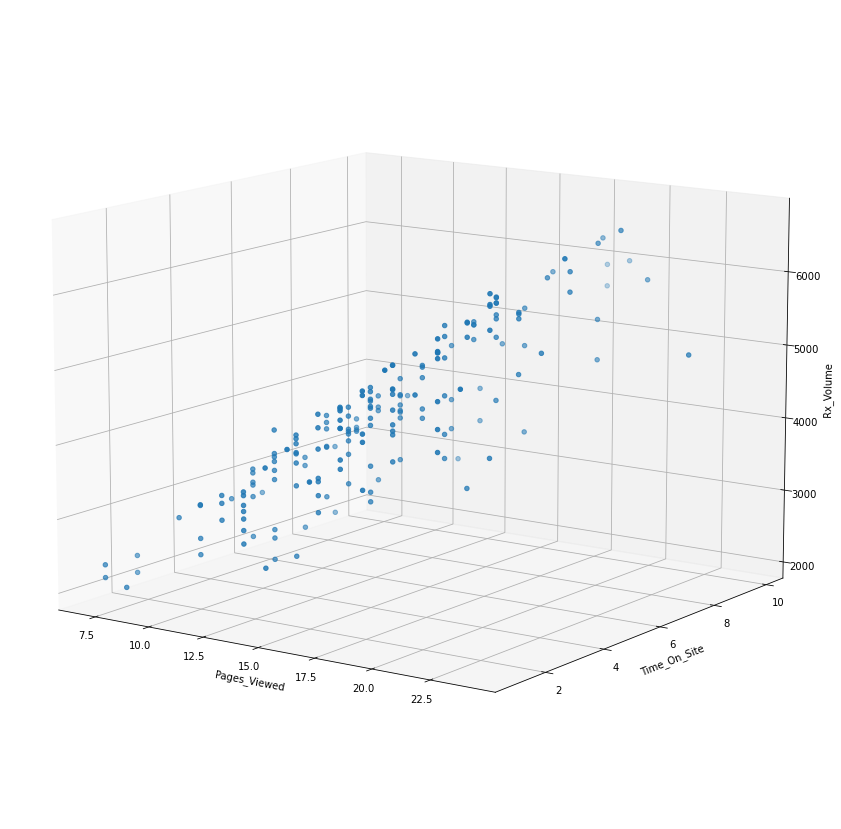

In [11]:
fig = plt.figure()
fig.set_size_inches(25, 15)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = df['Time_On_Site'], ys = df['Pages_Viewed'], zs = df['Rx_Volume'])

ax.set_ylabel('Time_On_Site'); ax.set_xlabel('Pages_Viewed'); ax.set_zlabel('Rx_Volume')
ax.view_init(12, -55)

Text(0, 0.5, 'Relative temperature')

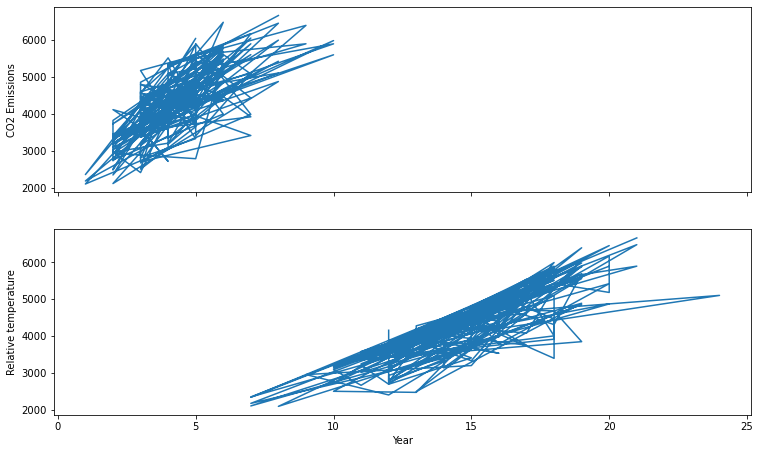

In [13]:
f, axarr = plt.subplots(2, sharex = True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(df['Pages_Viewed'], df['Rx_Volume'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(df['Time_On_Site'], df['Rx_Volume'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

C:\Users\vishal.desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rx_Volume', ylabel='count'>

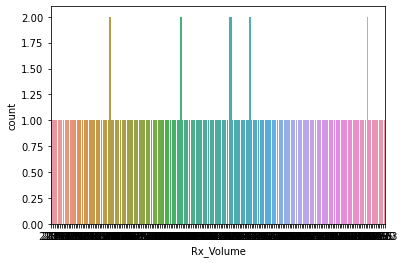

In [3]:
sns.countplot(df['Rx_Volume'])

In [4]:
#initial glimpse of the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Days             200 non-null    object
 1   Time_On_Site     200 non-null    int64 
 2   Pages_Viewed     200 non-null    int64 
 3   Website_Visits   200 non-null    int64 
 4   Media_clicks     200 non-null    int64 
 5   Pages_Per_Visit  200 non-null    int64 
 6   Repeat_Visits    200 non-null    int64 
 7   Rx_Volume        200 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 12.6+ KB


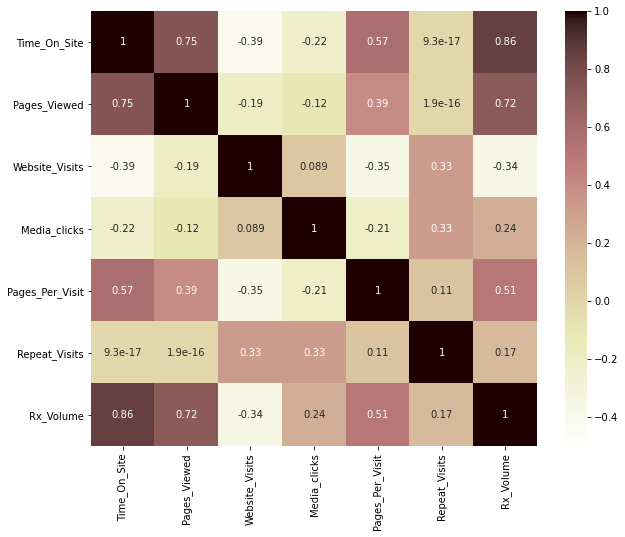

In [5]:
# heatmap with individual annotation for a multicollinearity map
correlation = df.corr()
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

Time_On_Site:  AxesSubplot(0.125,0.125;0.775x0.755)


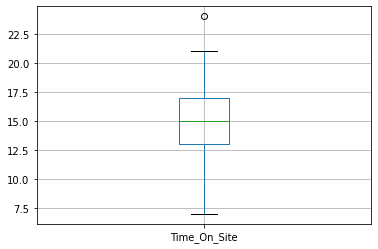

In [6]:
print("Time_On_Site: ", df.boxplot(column = 'Time_On_Site'))

Pages_Viewed:  AxesSubplot(0.125,0.125;0.775x0.755)


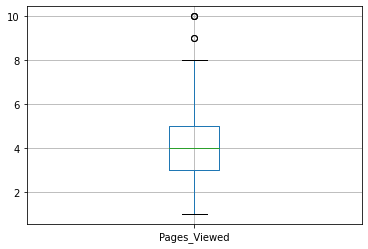

In [7]:
print("Pages_Viewed: ", df.boxplot(column = 'Pages_Viewed'))

Website_Visits:  AxesSubplot(0.125,0.125;0.775x0.755)


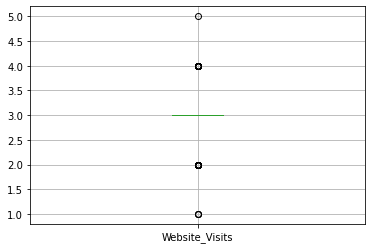

In [8]:
print("Website_Visits: ", df.boxplot(column = 'Website_Visits'))

Media_clicks:  AxesSubplot(0.125,0.125;0.775x0.755)


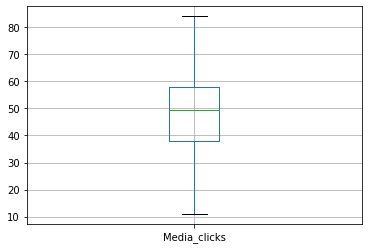

In [9]:
print("Media_clicks: ", df.boxplot(column = 'Media_clicks'))

Pages_Per_Visit:  AxesSubplot(0.125,0.125;0.775x0.755)


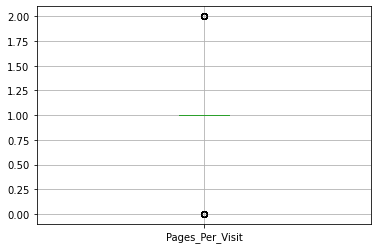

In [10]:
print("Pages_Per_Visit: ", df.boxplot(column = 'Pages_Per_Visit'))

Repeat_Visits:  AxesSubplot(0.125,0.125;0.775x0.755)


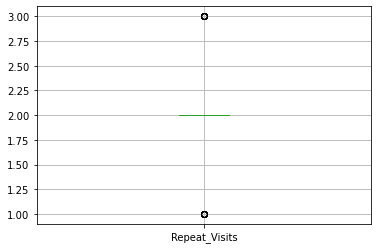

In [11]:
print("Repeat_Visits: ", df.boxplot(column = 'Repeat_Visits'))

Rx_Volume:  AxesSubplot(0.125,0.125;0.775x0.755)


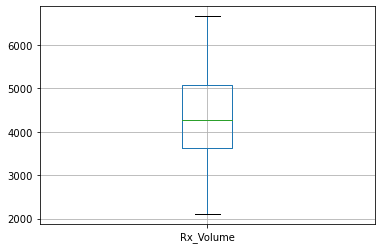

In [12]:
print("Rx_Volume: ", df.boxplot(column = 'Rx_Volume'))

Time_On_Site:  AxesSubplot(0.125,0.125;0.775x0.755)


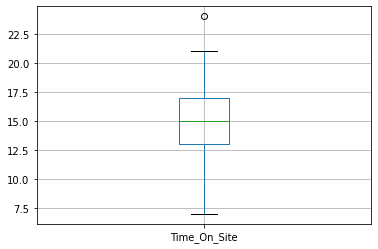

In [13]:
print("Time_On_Site: ", df.boxplot(column = 'Time_On_Site'))

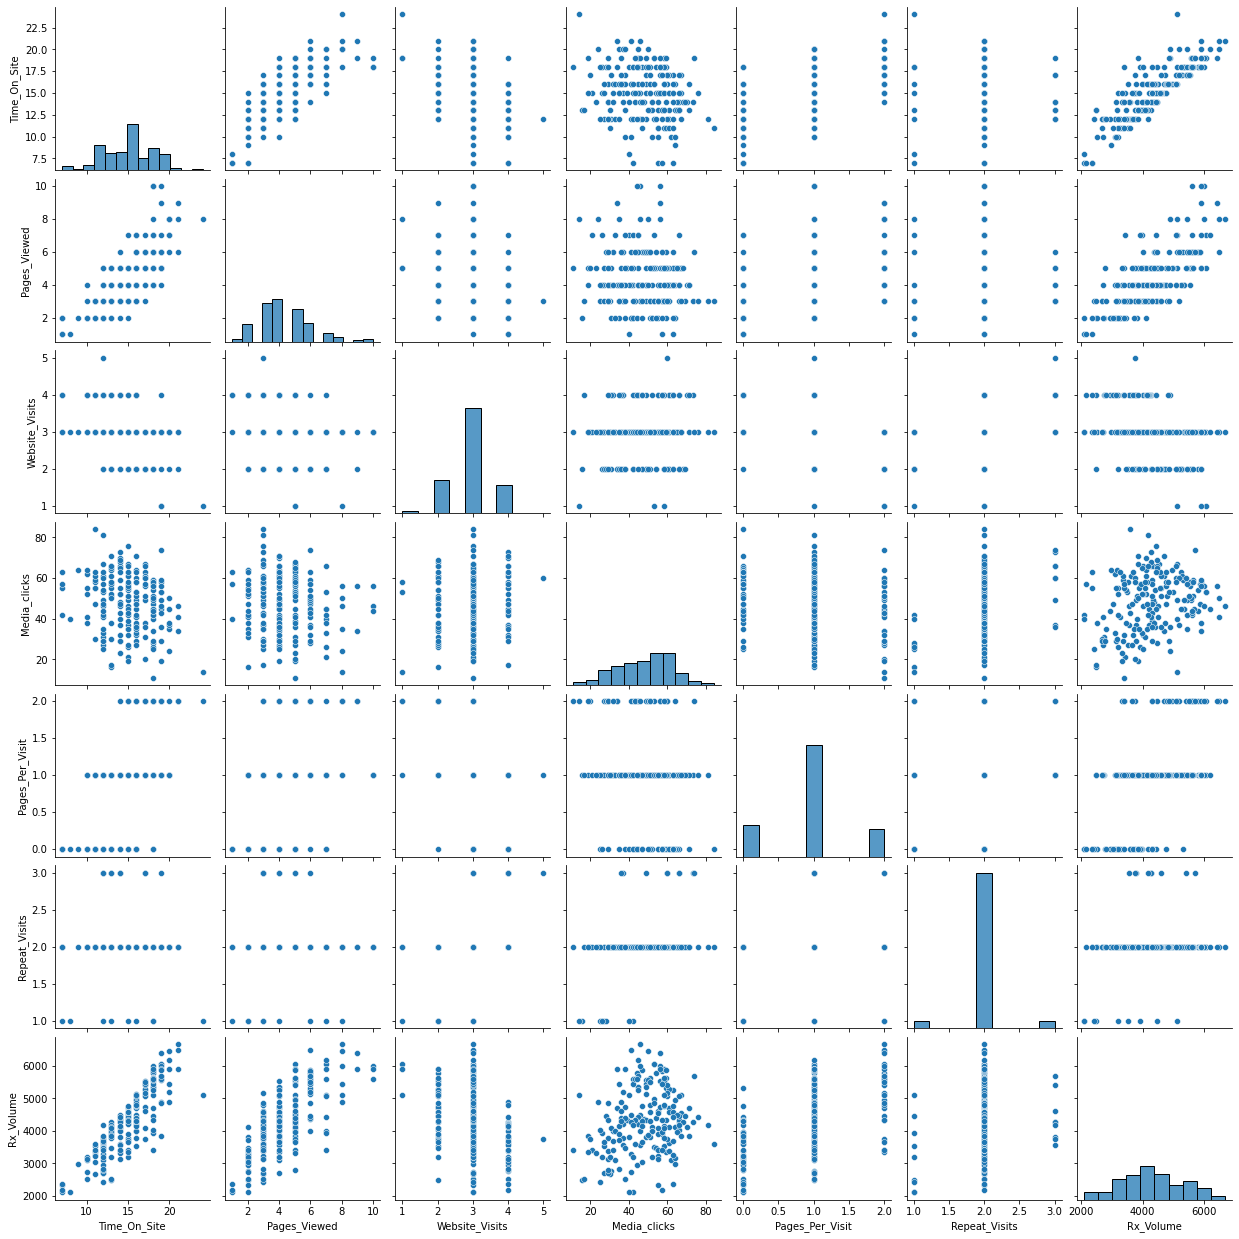

In [14]:
# creates a scatter matrix visualization between all features
sns.pairplot(df);

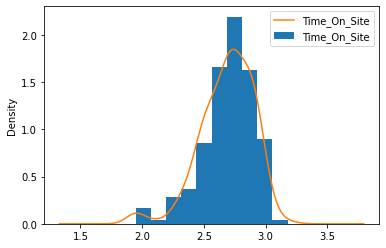

In [15]:
df['Time_On_Site'] = np.log(df['Time_On_Site'])
df['Time_On_Site'].plot.hist(density = True)
df['Time_On_Site'].plot.kde(label = 'Time_On_Site')
plt.legend()
plt.show()

In [16]:
df.columns

Index(['Days', 'Time_On_Site', 'Pages_Viewed', 'Website_Visits',
       'Media_clicks', 'Pages_Per_Visit', 'Repeat_Visits', 'Rx_Volume'],
      dtype='object')

In [18]:
# statsmodels linear regression model
col_names = df.describe().columns.drop(['Rx_Volume'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Zeposia: Rx_Volume~" + val)

    f = 'Rx_Volume~' + val
    model = smf.ols(formula = f, data = df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])
    print ("------------------------------")

Zeposia: Rx_Volume~Time_On_Site
['Time_On_Site', 0.7070435300656703, -6073.43556034627, 3863.438503339511, 1.098872135638831e-54]
------------------------------
Zeposia: Rx_Volume~Pages_Viewed
['Pages_Viewed', 0.5150651030212601, 2535.9426751592364, 409.04777070063653, 5.994696821811765e-33]
------------------------------
Zeposia: Rx_Volume~Website_Visits
['Website_Visits', 0.11789460948935226, 5826.596342857143, -513.6902857142859, 6.43985092772968e-07]
------------------------------
Zeposia: Rx_Volume~Media_clicks
['Media_clicks', 0.055492957786077546, 3514.394625240955, 16.548605913998855, 0.0007852109791925567]
------------------------------
Zeposia: Rx_Volume~Pages_Per_Visit
['Pages_Per_Visit', 0.2604043287116051, 3472.220907441017, 860.5016333938281, 1.1741191472294955e-14]
------------------------------
Zeposia: Rx_Volume~Repeat_Visits
['Repeat_Visits', 0.029402994258183157, 3179.9877777777774, 565.6111111111119, 0.015190556055097363]
------------------------------


In [19]:
df.columns

Index(['Days', 'Time_On_Site', 'Pages_Viewed', 'Website_Visits',
       'Media_clicks', 'Pages_Per_Visit', 'Repeat_Visits', 'Rx_Volume'],
      dtype='object')

In [20]:
formula = 'Rx_Volume~Time_On_Site + Pages_Viewed + Website_Visits + Media_clicks + Pages_Per_Visit + Repeat_Visits'
model=ols(formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Rx_Volume   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     316.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           5.17e-97
Time:                        19:45:08   Log-Likelihood:                -1424.9
No. Observations:                 200   AIC:                             2864.
Df Residuals:                     193   BIC:                             2887.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6332.5379    451.674    -14.020      0.000   -7223.389   -5441.687
Time_On_Site     3212.1797    172.324     18.640      0.000    2872.299    3552.061
Pages_Viewed      123.4169     18.310      6.741      0.000      87.304     159.529
Website_Visits    -60.4564     40.349     -1.498      0.136    -140.039      19.126
Media_clicks       29.7345      1.725     17.240      0.000      26.333      33.136
Pages_Per_Visit   162.9352     47.564      3.426      0.001      69.123     256.747
Repeat_Visits      30.8896     86.798      0.356      0.722    -140.305     202.084
==============================================================================
Omnibus:                        2.816   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                2.529
Skew:                           0.271   Prob(JB):                        0.282
Kurtosis:                       3.100   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
formula1 = 'Rx_Volume ~ Time_On_Site + Media_clicks + Pages_Viewed + Pages_Per_Visit'
model = ols(formula1, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Rx_Volume   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     473.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           3.51e-99
Time:                        19:45:10   Log-Likelihood:                -1426.1
No. Observations:                 200   AIC:                             2862.
Df Residuals:                     195   BIC:                             2879.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6662.8568    392.790    -16.963      0.000   -7437.518   -5888.196
Time_On_Site     3287.6839    164.413     19.996      0.000    2963.428    3611.940
Media_clicks       30.0089      1.581     18.978      0.000      26.890      33.127
Pages_Viewed      119.2754     18.059      6.605      0.000      83.660     154.891
Pages_Per_Visit   178.8961     45.385      3.942      0.000      89.388     268.404
==============================================================================
Omnibus:                        2.808   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.545
Skew:                           0.273   Prob(JB):                        0.280
Kurtosis:                       3.082   Cond. No.                         988.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Testing Fit Through Recursive Feature Elimination

In [27]:
df1 = df.drop('Days', axis = 1)

In [29]:
#from sklearn.datasets import make_friedman1
predictors = df1
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(predictors, df.Rx_Volume)

In [30]:
selector.support_ 

array([ True, False, False,  True, False, False,  True])

In [31]:
selector.ranking_

array([1, 3, 2, 1, 4, 5, 1])

In [35]:
df.columns

Index(['Days', 'Time_On_Site', 'Pages_Viewed', 'Website_Visits',
       'Media_clicks', 'Pages_Per_Visit', 'Repeat_Visits', 'Rx_Volume'],
      dtype='object')

In [33]:
estimators = selector.estimator_
print("Estimators_Coef: ", estimators.coef_)
print("Estimators_Intercept: ", estimators.intercept_)

Estimators_Coef:  [7.37708419e-13 3.53285348e-14 1.00000000e+00]
Estimators_Intercept:  -1.8189894035458565e-12


In [36]:
#set data 
y = df[["Rx_Volume"]]
X = df[['Time_On_Site', 'Pages_Viewed', 'Website_Visits',
        'Media_clicks', 'Pages_Per_Visit', 'Repeat_Visits',]]

In [37]:
# import tools and load test-train-split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

160 40 160 40


In [38]:
# perform regression on train and tests sets
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
# residuals are also trained and tested
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [45]:
# mean squared error test
mse_train = np.sum((y_train - y_hat_train)**2) / len(y_train)
mse_test =np.sum((y_test - y_hat_test)**2) / len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: Rx_Volume    90967.467339
dtype: float64
Test Mean Squarred Error: Rx_Volume    90846.822295
dtype: float64


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [59]:
calc_vif(X)

,variables,VIF
0,Time_On_Site,70.299847
1,Pages_Viewed,11.307494
2,Website_Visits,25.788860
3,Media_clicks,15.007078
4,Pages_Per_Visit,5.962438
5,Repeat_Visits,65.809271
